**Question 1**

In [41]:
pip install mlinsights

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier

In [43]:
data = pd.read_csv('haberman.data')

In [44]:
data

A   B  C  D
0    30  64  1  1
1    30  62  3  1
2    30  65  0  1
3    31  59  2  1
4    31  65  4  1
..   ..  .. .. ..
301  75  62  1  1
302  76  67  0  1
303  77  65  3  1
304  78  65  1  2
305  83  58  2  2

[306 rows x 4 columns]

In [45]:
data.columns=['Age','Year','positive axillary nodes','survival status']

In [46]:
data.head()

Age  Year  positive axillary nodes  survival status
0   30    64                        1                1
1   30    62                        3                1
2   30    65                        0                1
3   31    59                        2                1
4   31    65                        4                1

In [47]:
X_data=data[data.columns[:-1]]
Y_data=data[data.columns[-1]]

In [48]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(X_data)
X_data=scaler.transform(X_data)

In [49]:
from sklearn.decomposition import PCA
p = PCA(n_components=2,random_state=99)
p.fit(X_data)

PCA(n_components=2, random_state=99)

In [50]:
X_PCA = p.transform(X_data)

In [51]:
Y = data[data.columns[-1]]

In [52]:
split=[0.4,0.3,0.2,0.1]
k_value=[1,2,3,4,5]
accuracy_split_l1={}
accuracy_split_l2={}
for ratio in split:
  print('when split is',(1-ratio)*100,':',ratio*100)
  X_data_train,X_data_test,Y_data_train,Y_data_test = train_test_split(X_PCA, Y, test_size=ratio, random_state=99)
  accuracy_l1=[]
  accuracy_l2=[]

  for k in k_value:
    print('when k is:',k)
    neigh_l1 = KNeighborsClassifier(n_neighbors=k ,metric= 'manhattan' )
    neigh_l2= KNeighborsClassifier(n_neighbors=k  )
    neigh_l1.fit(X_data_train,Y_data_train)
    neigh_l2.fit(X_data_train,Y_data_train)
    pred_l1=neigh_l1.predict(X_data_test)
    pred_l2=neigh_l2.predict(X_data_test)

    print('accuracy with l1 matric:',accuracy_score(Y_data_test, pred_l1))
    print('accuracy with l2 matric:',accuracy_score(Y_data_test, pred_l2))
    accuracy_l1.append(accuracy_score(Y_data_test, pred_l1))
    accuracy_l2.append(accuracy_score(Y_data_test, pred_l2))
  accuracy_split_l1[ratio]=accuracy_l1
  accuracy_split_l2[ratio]=accuracy_l2
    
print() 

when split is 60.0 : 40.0
when k is: 1
accuracy with l1 matric: 0.5934959349593496
accuracy with l2 matric: 0.5772357723577236
when k is: 2
accuracy with l1 matric: 0.6585365853658537
accuracy with l2 matric: 0.6666666666666666
when k is: 3
accuracy with l1 matric: 0.6260162601626016
accuracy with l2 matric: 0.6097560975609756
when k is: 4
accuracy with l1 matric: 0.6666666666666666
accuracy with l2 matric: 0.6504065040650406
when k is: 5
accuracy with l1 matric: 0.6341463414634146
accuracy with l2 matric: 0.6341463414634146
when split is 70.0 : 30.0
when k is: 1
accuracy with l1 matric: 0.5869565217391305
accuracy with l2 matric: 0.5760869565217391
when k is: 2
accuracy with l1 matric: 0.6413043478260869
accuracy with l2 matric: 0.6413043478260869
when k is: 3
accuracy with l1 matric: 0.6195652173913043
accuracy with l2 matric: 0.5869565217391305
when k is: 4
accuracy with l1 matric: 0.6304347826086957
accuracy with l2 matric: 0.6195652173913043
when k is: 5
accuracy with l1 matric: 0

# **Question 2:**

In [53]:
from sklearn.datasets import fetch_california_housing

california_housing = fetch_california_housing(as_frame=True)

In [54]:
print(california_housing.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [55]:
data=california_housing.frame

In [56]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
data1=pd.DataFrame(scaler.fit_transform(data),columns=data.columns)

In [57]:
#For K=2
from sklearn.decomposition import PCA
p = PCA(n_components=2,random_state=99)
p.fit(data1)

PCA(n_components=2, random_state=99)

In [58]:
data1_d = p.transform(data1)

In [59]:
data_l2 = data.copy()

In [60]:
from sklearn.cluster import KMeans
k_values=[2,3,4,5]
for k in k_values:
  kmeans = KMeans(n_clusters=k,random_state=99, n_init="auto" ,tol= 1e-3  ).fit(data1_d)
  label_data=kmeans.labels_
  data_l2[f'prediction with k:{k} with l2']=label_data
data_l2.head()

MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  MedHouseVal  prediction with k:2 with l2  \
0    -122.23        4.526                            1   
1    -122.22        3.585                            1   
2    -122.24        3.521                            1   
3    -122.25        3.413                            1   
4    -122.25        3.422                            1   

   prediction with k:3 with l2  prediction with k:4 with l2  \
0                            2                            1   
1                            2                            2   
2                            1                            1   
3                            1                            1   
4                            1                            1   

   prediction with k:5 with l2  
0                            2  
1                            2  
2                            2  
3                            1  
4                            1

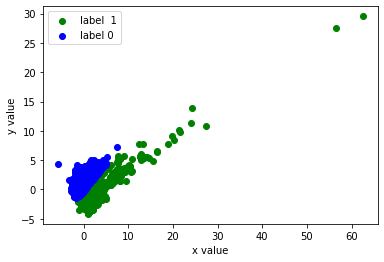

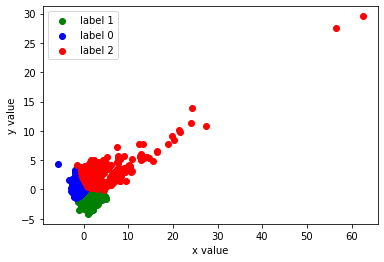

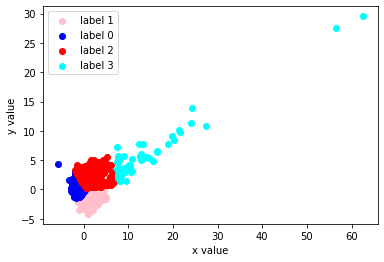

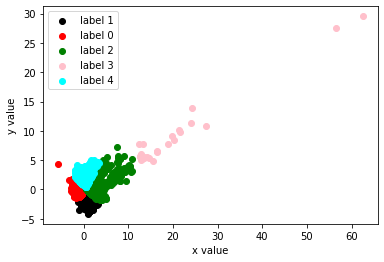

In [61]:
df=pd.DataFrame(data1_d,columns=['x','y'])
df['label']=data_l2[f'prediction with k:{2} with l2']
df1=df[df['label']==1]
df2=df[df['label']==0]
plt.scatter(df1['x'],df1['y'],color='g',label='label  1')
plt.scatter(df2['x'],df2['y'],color='b',label='label 0')
plt.xlabel('x value')
plt.ylabel('y value')
plt.legend()
plt.show()

df=pd.DataFrame(data1_d,columns=['x','y'])
df['label']=data_l2[f'prediction with k:{3} with l2']
df1=df[df['label']==1]
df2=df[df['label']==0]
df3=df[df['label']==2]
plt.scatter(df1['x'],df1['y'],color='g',label='label 1')
plt.scatter(df2['x'],df2['y'],color='b',label='label 0')
plt.scatter(df3['x'],df3['y'],color='r',label='label 2')
plt.xlabel('x value')
plt.ylabel('y value')
plt.legend()
plt.show()

df=pd.DataFrame(data1_d,columns=['x','y'])
df['label']=data_l2[f'prediction with k:{4} with l2']
df1=df[df['label']==1]
df2=df[df['label']==0]
df3=df[df['label']==2]
df4=df[df['label']==3]
plt.scatter(df1['x'],df1['y'],color='pink',label='label 1')
plt.scatter(df2['x'],df2['y'],color='b',label='label 0')
plt.scatter(df3['x'],df3['y'],color='r',label='label 2')
plt.scatter(df4['x'],df4['y'],color='cyan',label='label 3')
plt.xlabel('x value')
plt.ylabel('y value')
plt.legend()
plt.show()

df=pd.DataFrame(data1_d,columns=['x','y'])
df['label']=data_l2[f'prediction with k:{5} with l2']
df1=df[df['label']==1]
df2=df[df['label']==0]
df3=df[df['label']==2]
df4=df[df['label']==3]
df5=df[df['label']==4]
plt.scatter(df1['x'],df1['y'],color='black',label='label 1')
plt.scatter(df2['x'],df2['y'],color='r',label='label 0')
plt.scatter(df3['x'],df3['y'],color='g',label='label 2')
plt.scatter(df4['x'],df4['y'],color='pink',label='label 3')
plt.scatter(df5['x'],df5['y'],color='cyan',label='label 4')
plt.xlabel('x value')
plt.ylabel('y value')
plt.legend()
plt.show()

In [62]:
df1

x         y  label
3      1.537078 -0.810004      1
4      1.416914 -1.121116      1
5      1.023718 -1.503093      1
6      0.819253 -1.463167      1
7      0.728173 -1.715481      1
...         ...       ...    ...
20635  0.602464 -2.251757      1
20636  1.264302 -1.815928      1
20637  0.687380 -2.056770      1
20638  0.828435 -2.073240      1
20639  0.771440 -1.832743      1

[7206 rows x 3 columns]

In [63]:
data_l2[f'prediction with k:{2} with l2']

0        1
1        1
2        1
3        1
4        1
        ..
20635    1
20636    1
20637    1
20638    1
20639    1
Name: prediction with k:2 with l2, Length: 20640, dtype: int32

In [78]:
data_l1=data.copy()

In [79]:
from mlinsights.mlmodel import KMeansL1L2

In [80]:
print("For L1 Norm")
for i in k_values:
  kml1 = KMeansL1L2(i, norm='L1',tol = 1e-3,random_state = 99).fit(data1_d)
  data_l1[f'prediction with k:{i} with l1'] = kml1.labels_
data_l1.head()

For L1 Norm


MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  MedHouseVal  prediction with k:2 with l1  \
0    -122.23        4.526                            1   
1    -122.22        3.585                            1   
2    -122.24        3.521                            1   
3    -122.25        3.413                            1   
4    -122.25        3.422                            1   

   prediction with k:3 with l1  prediction with k:4 with l1  \
0                            1                            1   
1                            1                            1   
2                            2                            1   
3                            2                            1   
4                            2                            1   

   prediction with k:5 with l1  
0                            2  
1                            2  
2                            2  
3                            2  
4                            2

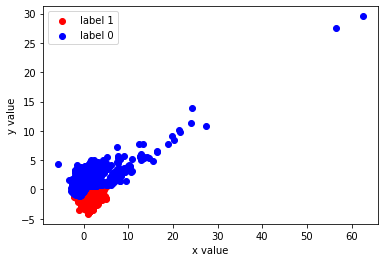

In [81]:
df=pd.DataFrame(data1_d,columns=['x','y'])
df['label']=data_l1[f'prediction with k:{2} with l1']
df1=df[df['label']==1]
df2=df[df['label']==0]
plt.scatter(df1['x'],df1['y'],color='r',label='label 1')
plt.scatter(df2['x'],df2['y'],color='b',label='label 0')
plt.xlabel('x value')
plt.ylabel('y value')
plt.legend()
plt.show()

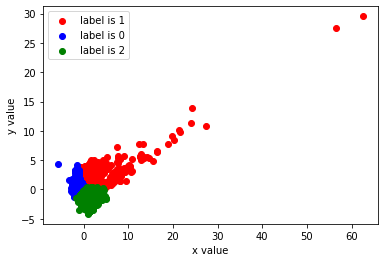

In [82]:
df=pd.DataFrame(data1_d,columns=['x','y'])
df['label']=data_l1[f'prediction with k:{3} with l1']
df1=df[df['label']==1]
df2=df[df['label']==0]
df3=df[df['label']==2]
plt.scatter(df1['x'],df1['y'],color='r',label='label is 1')
plt.scatter(df2['x'],df2['y'],color='b',label='label is 0')
plt.scatter(df3['x'],df3['y'],color='g',label='label is 2')
plt.xlabel('x value')
plt.ylabel('y value')
plt.legend()
plt.show()

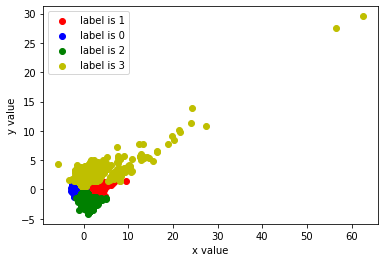

In [83]:
df=pd.DataFrame(data1_d,columns=['x','y'])
df['label']=data_l1[f'prediction with k:{4} with l1']
df1=df[df['label']==1]
df2=df[df['label']==0]
df3=df[df['label']==2]
df4=df[df['label']==3]
plt.scatter(df1['x'],df1['y'],color='r',label='label is 1')
plt.scatter(df2['x'],df2['y'],color='b',label='label is 0')
plt.scatter(df3['x'],df3['y'],color='g',label='label is 2')
plt.scatter(df4['x'],df4['y'],color='y',label='label is 3')
plt.xlabel('x value')
plt.ylabel('y value')
plt.legend()
plt.show()

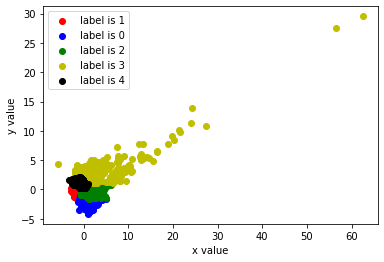

In [84]:
df=pd.DataFrame(data1_d,columns=['x','y'])
df['label']=data_l1[f'prediction with k:{5} with l1']
df1=df[df['label']==1]
df2=df[df['label']==0]
df3=df[df['label']==2]
df4=df[df['label']==3]
df5=df[df['label']==4]
plt.scatter(df1['x'],df1['y'],color='r',label='label is 1')
plt.scatter(df2['x'],df2['y'],color='b',label='label is 0')
plt.scatter(df3['x'],df3['y'],color='g',label='label is 2')
plt.scatter(df4['x'],df4['y'],color='y',label='label is 3')
plt.scatter(df5['x'],df5['y'],color='k',label='label is 4')
plt.xlabel('x value')
plt.ylabel('y value')
plt.legend()
plt.show()